In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


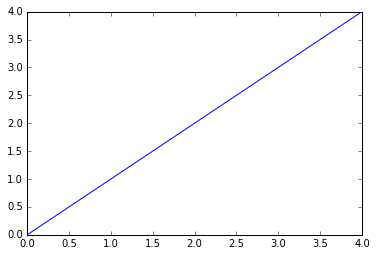

In [3]:
plot(arange(5))

In [4]:
import pandas as pd 

In [5]:
import numpy as np


In [6]:
import matplotlib as plt

In [7]:
df = pd.read_csv("~/train.csv")

In [9]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,NaN,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516,95,360,1,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504,158,360,0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526,168,360,1,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968,349,360,1,Semiurban,N


In [10]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

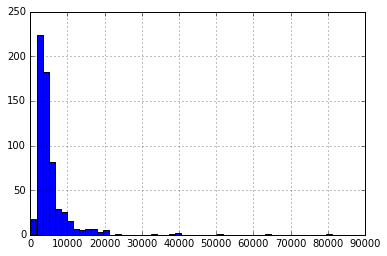

In [12]:
df['ApplicantIncome'].hist(bins=50)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x7f76c51c3650>],
 'caps': [<matplotlib.lines.Line2D at 0x7f76c5152790>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f76c56bad10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f76c515c450>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f76c51c3a50>,
  <matplotlib.lines.Line2D at 0x7f76c5152150>]}

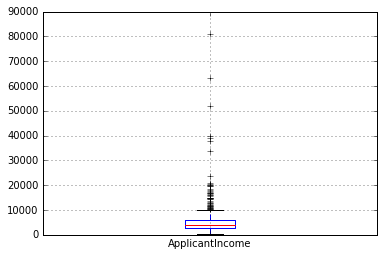

In [13]:
df.boxplot(column='ApplicantIncome')

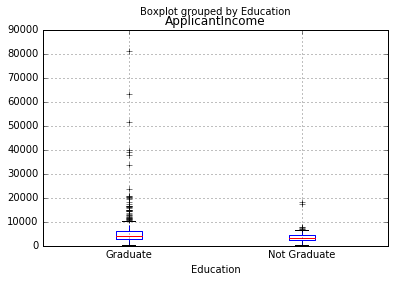

In [14]:
df.boxplot(column='ApplicantIncome', by = 'Education')

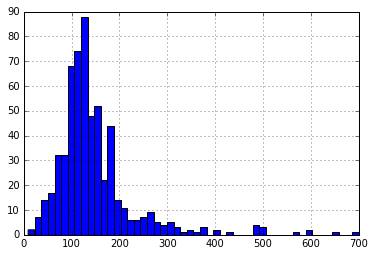

In [15]:
df['LoanAmount'].hist(bins=50)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x7f76c4e2f510>],
 'caps': [<matplotlib.lines.Line2D at 0x7f76c4d8d690>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f76c4d95990>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f76c4d95350>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f76c4dfd950>,
  <matplotlib.lines.Line2D at 0x7f76c4d8d050>]}

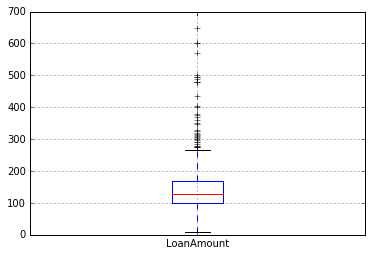

In [16]:
df.boxplot(column='LoanAmount')

In [17]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print 'Frequency Table for Credit History:' 
print temp1

print '\nProbility of getting loan for each Credit History class:' 
print temp2

Frequency Table for Credit History:
0     89
1    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
Credit_History
0    0.078652
1    0.795789
Name: Loan_Status, dtype: float64


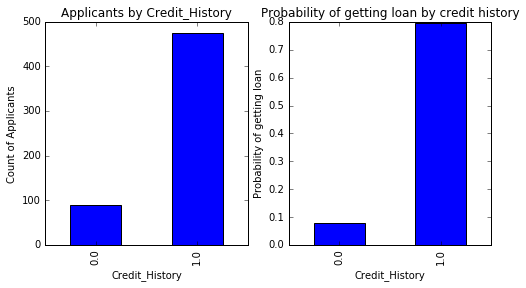

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

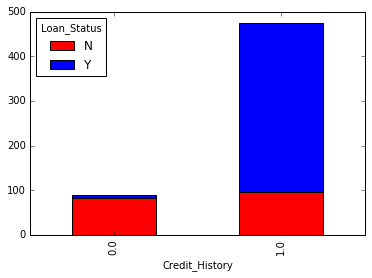

In [19]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [ ]:
j